<a href="https://colab.research.google.com/github/zangell44/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# but first, imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# load the data as a pandas df

cancer_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# feature description - http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
features = ['patient_age', 'operation_year', 'auxillary_nodes', 'survived']

cancer_df = pd.read_csv(cancer_url, header=None, names=features)

In [148]:
# validate number of observations

# based on the description, we should have 4 features and 306 observations
print ('There are', cancer_df.shape[0], 'obervations and', cancer_df.shape[1],
       'features in the dataframe')

There are 306 obervations and 4 features in the dataframe


In [149]:
# validate no missing values
print ('There are', cancer_df.isnull().sum().sum(), 'missing values in the data')

There are 0 missing values in the data


In [0]:
# add informative names to the features - MOVED INTO LOADING OPERATION ABOVE

# feature description - http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
# features = ['patient_age', 'operation_year', 'auxillary_nodes', 'survived']
# cancer_df.columns = features

In [0]:
# encode survival variable as binary

cancer_df['survived'] = cancer_df['survived'] == 1

In [0]:
# other

# the year variable being normalized to year - 1900 is a little annoying, lets fix it
cancer_df['operation_year'] = cancer_df['operation_year'] + 1900

In [153]:
# print dataframe head to demonstrate successful steps
cancer_df.head()

,patient_age,operation_year,auxillary_nodes,survived
0,30,1964,1,True
1,30,1962,3,True
2,30,1965,0,True
3,31,1959,2,True
4,31,1965,4,True


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [154]:
# table 1

# summary statistics for the dataframe
cancer_df.describe()

,patient_age,operation_year,auxillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,1958.000000,0.000000
25%,44.000000,1960.000000,0.000000
50%,52.000000,1963.000000,1.000000
75%,60.750000,1965.750000,4.000000
max,83.000000,1969.000000,52.000000


This table gives us a useful overview of the independent variables.

Age is centered between 44 and 60, but there are some very young or very old patients that we may want to account for when performing further analysis.

Operation Year is a fairly short time period, between 1958 and 1969. It will be interesting to see how much of a difference 11 years of medical knowledge may or may not make.

Summary statistics are particularly important for Auxillary Nodes found, because I don't have any domain intuition.

https://ww5.komen.org/uploadedfiles/_komen/content/about_breast_cancer/tools_and_resources/fact_sheets_and_breast_self_awareness_cards/axillarylymphnodes.pdf

A quick google search seems to indicate finding more auxillary nodes in a procedure would be bad. However, it is possible that finding too few is also harmful, because the surgeon may not have found them all.

Furhtermore, the distribution of Auxillary Nodes needs to be investigated. The maximum of 52 may be an outlier that needs to be removed for futher analysis.

In [155]:
# table 2

# correlation matrix for first look at relations between variables
cancer_df.corr()

,patient_age,operation_year,auxillary_nodes,survived
patient_age,1.000000,0.089529,-0.063176,-0.067950
operation_year,0.089529,1.000000,-0.003764,0.004768
auxillary_nodes,-0.063176,-0.003764,1.000000,-0.286768
survived,-0.067950,0.004768,-0.286768,1.000000


Correlation matrices are a good starting point for examining possible relationships between variables. Correlation is only a linear measure, we will visualize correlations in the Plots section to explore possible non-linear relationships.

Survival is most (inversely) correlated with the number of Auxillary Nodes found during the procedure. This would make sense, as more Auxillary Nodes found may indicate that cancer is further developed at the time of the procedure.

Survival is also slightly (inversely) correlated with Age. Again, this would make sense, as older patients are less able to recover from illnesses on average.

Interestingly, Age and Auxillary Nodes found have an inverse correlation. It's possible that (1) older patients have caught cancer earlier because they are more likely to be concerned or (2) if cancer were more likely to affect a younger patient, it is likely to be more severe.

Operation Year seems to be largely unrelated to other variables. It has a moderate correlation with age, perhaps indicating doctors became more comfortable attempting the procedure on older patients during the period.

In [0]:
# further tables

# # cross tablulation of survival rate and all three other variables

# # binning data for easier visualization

# age_bins = pd.cut(cancer_df['patient_age'], 4) # bin by decade-ish
# year_bins = pd.cut(cancer_df['operation_year'], 2) # split op year in half
# nodes_bins = pd.cut(cancer_df['auxillary_nodes'], 3)

# # pd.crosstab([cancer_df['patient_age'], cancer_df['operation_year'], 
# #              cancer_df['auxillary_nodes']], cancer_df['survived'], 
# #              normalize='columns')


# # pd.crosstab(cancer_df['survived'], [age_bins, nodes_bins],
# #              normalize='columns')

In [157]:
# cross tablulation - survival by year
pd.crosstab(cancer_df['survived'], cancer_df['operation_year'], normalize='columns')

operation_year,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969
survived,,,,,,,,,,,,
False,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
True,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


No clear trend observed here. Perhaps when controlling for other variables, operation year positively affects survival outcomes.

In [158]:
# cross tabulation - survival by number of auxillary nodes
nodes_bins_granular = pd.cut(cancer_df['auxillary_nodes'], 7, precision=0)
pd.crosstab(cancer_df['survived'], nodes_bins_granular, normalize='columns')

auxillary_nodes,"(-0.1, 7.0]","(7.0, 15.0]","(15.0, 22.0]","(22.0, 30.0]","(30.0, 37.0]","(37.0, 45.0]","(45.0, 52.0]"
survived,,,,,,,
False,0.204,0.516129,0.533333,0.666667,0.5,0.0,0.5
True,0.796,0.483871,0.466667,0.333333,0.5,0.0,0.5


The larger auxillary node buckets are biased by small sample size, hence the erratic values.

However, it seems clear that chances of survival sharply decrease as auxillary nodes increases to greater than 7. 

In [159]:
# cross tabulation - survival by patient age
age_bins_granular = pd.cut(cancer_df['patient_age'], 8, precision=0)

pd.crosstab(cancer_df['survived'], age_bins_granular, normalize='columns')

patient_age,"(30.0, 37.0]","(37.0, 43.0]","(43.0, 50.0]","(50.0, 56.0]","(56.0, 63.0]","(63.0, 70.0]","(70.0, 76.0]","(76.0, 83.0]"
survived,,,,,,,,
False,0.111111,0.2,0.352941,0.30137,0.232143,0.28125,0.222222,0.666667
True,0.888889,0.8,0.647059,0.69863,0.767857,0.71875,0.777778,0.333333


With the exception of those under 40, survival rates do not appear to vary significantly across age even before controlling for other variables.

In [160]:
# cross tabulation - age and auxillary nodes
pd.crosstab(nodes_bins_granular, age_bins_granular, normalize='columns')

patient_age,"(30.0, 37.0]","(37.0, 43.0]","(43.0, 50.0]","(50.0, 56.0]","(56.0, 63.0]","(63.0, 70.0]","(70.0, 76.0]","(76.0, 83.0]"
auxillary_nodes,,,,,,,,
"(-0.1, 7.0]",0.722222,0.836364,0.784314,0.821918,0.821429,0.81250,0.888889,1.0
"(7.0, 15.0]",0.222222,0.072727,0.137255,0.082192,0.089286,0.09375,0.111111,0.0
"(15.0, 22.0]",0.000000,0.054545,0.058824,0.054795,0.035714,0.09375,0.000000,0.0
"(22.0, 30.0]",0.000000,0.018182,0.019608,0.027397,0.035714,0.00000,0.000000,0.0
"(30.0, 37.0]",0.055556,0.000000,0.000000,0.000000,0.017857,0.00000,0.000000,0.0
"(37.0, 45.0]",0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
"(45.0, 52.0]",0.000000,0.018182,0.000000,0.013699,0.000000,0.00000,0.000000,0.0


Interestingly, *less* auxillary nodes are likely to be found as patient age increases. This pattern is most reliable for the lowest buckets of auxillary nodes, after that, incidence rates are too low to show a significant pattern.

It is possible that older patients are either (1) not able to survive a surgery removing as many auxillary nodes or (2) less likely to 

In [161]:
# cross tabulation - year and auxillary nodes
pd.crosstab(nodes_bins_granular, cancer_df['operation_year'], normalize='columns')


operation_year,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969
auxillary_nodes,,,,,,,,,,,,
"(-0.1, 7.0]",0.833333,0.777778,0.857143,0.769231,0.826087,0.800000,0.870968,0.750000,0.785714,0.88,0.923077,0.727273
"(7.0, 15.0]",0.111111,0.185185,0.071429,0.153846,0.043478,0.066667,0.129032,0.107143,0.142857,0.04,0.000000,0.090909
"(15.0, 22.0]",0.000000,0.037037,0.035714,0.000000,0.086957,0.066667,0.000000,0.107143,0.071429,0.04,0.076923,0.181818
"(22.0, 30.0]",0.000000,0.000000,0.035714,0.076923,0.000000,0.066667,0.000000,0.035714,0.000000,0.00,0.000000,0.000000
"(30.0, 37.0]",0.027778,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
"(37.0, 45.0]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
"(45.0, 52.0]",0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.000000,0.000000


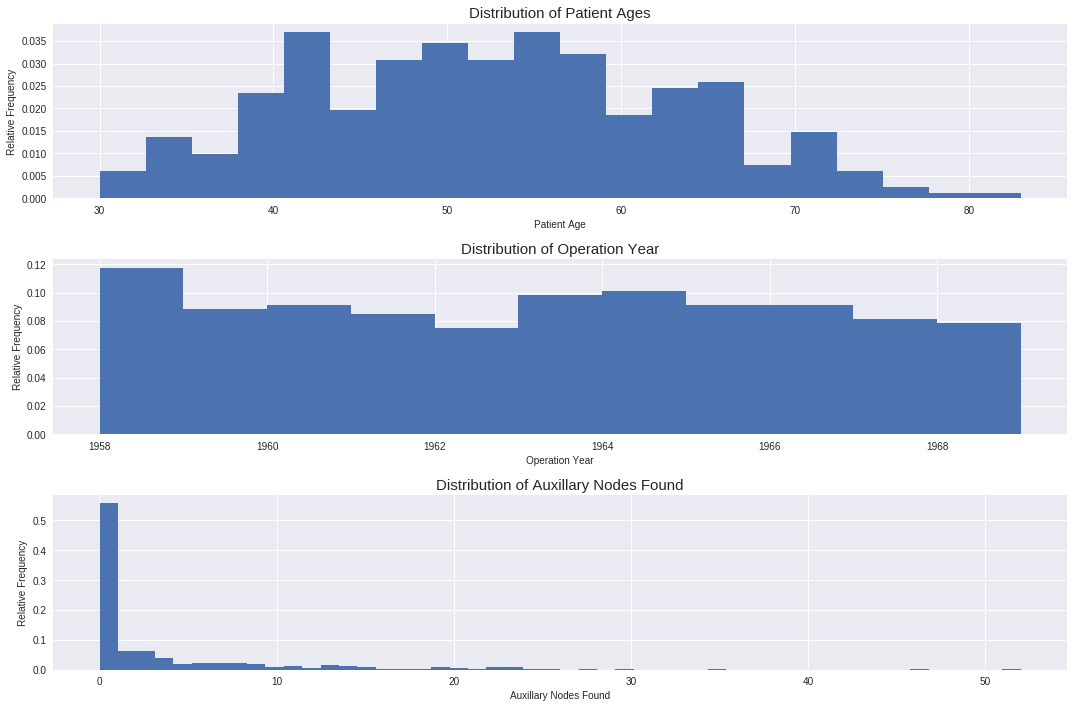

In [162]:
# plot 1

# examine the distribution of patient_age, operation_year, and auxillary nodes
# histograms will do best for this

fig_hist, axes_hist = plt.subplots(3,1,figsize=(15,10))

ax_age = axes_hist[0]
ax_year = axes_hist[1]
ax_nodes = axes_hist[2]

#age
#age_freq = range(15,80)
ax_age.hist(cancer_df['patient_age'], density=True, bins=20)
                 
ax_age.set_xlabel('Patient Age', fontsize=10)
ax_age.set_ylabel('Relative Frequency', fontsize=10)
ax_age.set_title('Distribution of Patient Ages', fontsize=15)

# operation year
#weight_freq = range(100,250)
ax_year.hist(cancer_df['operation_year'], density=True, bins=11)
                 
ax_year.set_xlabel('Operation Year', fontsize=10)
ax_year.set_ylabel('Relative Frequency', fontsize=10)
ax_year.set_title('Distribution of Operation Year', fontsize=15)

# auxillary nodes
#exercise_freq = range(0,300)
ax_nodes.hist(cancer_df['auxillary_nodes'], density=True, bins=50)
                 
ax_nodes.set_xlabel('Auxillary Nodes Found', fontsize=10)
ax_nodes.set_ylabel('Relative Frequency', fontsize=10)
ax_nodes.set_title('Distribution of Auxillary Nodes Found', fontsize=15)

plt.tight_layout()
plt.show();


Age looks to be normally-ish distributed, but skewed to the right. 

Operation Year is close to uniformly distributed. 

Auxillary Nodes, as I suspected from summary data, is heavily right skewed. We'll have to handle this carefully. 

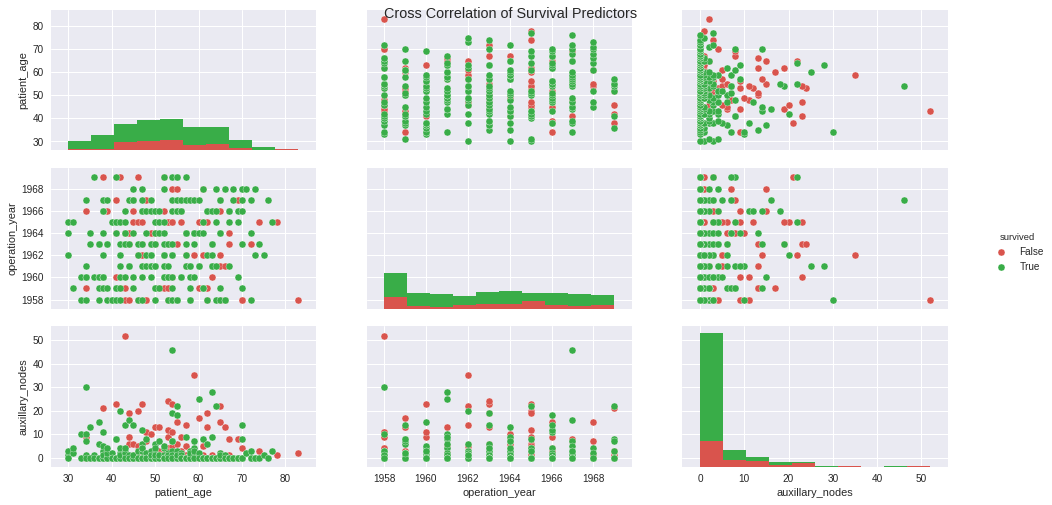

In [163]:
# plot 2 

# correlation and impact on survival

import seaborn as sns

survived_color_map = {False : sns.xkcd_rgb["pale red"], True : sns.xkcd_rgb["medium green"]}

pair_plot = sns.pairplot(cancer_df, hue='survived', vars=['patient_age', 'operation_year', 'auxillary_nodes'],
             size=3,
             palette=survived_color_map)

pair_plot.fig.set_size_inches(15,7)
pair_plot.fig.suptitle('Cross Correlation of Survival Predictors');

This furthers the intuition developed in the previous analyses.

Auxillary Nodes found looks to be the strongest predictor of Survival, the two show a clear inverse relationship.



In [164]:
# further plots and analyis

# enhance data - include no auxillary nodes found flag
cancer_df['auxillary_found'] = cancer_df['auxillary_nodes'] > 0

cancer_df[['auxillary_found', 'survived', 'operation_year', 'patient_age']].corr()

,auxillary_found,survived,operation_year,patient_age
auxillary_found,1.000000,-0.253421,-0.068927,-0.103523
survived,-0.253421,1.000000,0.004768,-0.067950
operation_year,-0.068927,0.004768,1.000000,0.089529
patient_age,-0.103523,-0.067950,0.089529,1.000000


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The only feature that has a positive linear relationship with survival is the year the operation was performed.

Auxillary nodes found has the most significant negative correlation with survival. 
  
 At first, the operation year and auxillary nodes appear to have no relation. However, when changing the auxillary nodes value to a binary 0 or greater than 0, there appears to be an inverse relationship between the two. 
 
 This could mean that breast cancer is being detected earlier, and thus less likely to spread. If that is the case, the confounding variable would be meidcal knowledge in the area of breast cancer detection.
 
 Earlier detection->less auxillary nodes found->less deaths
 
 Further analysis would be necessary to confirm any initial opinions of the relationship.